#**Linear Regression(SGD)**



---
Importing the required packages


---



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random
from numpy import linalg as LA

print( 'import done')

import done




---
Using the dataset **california_housing** and trying to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [33]:
housing_data = california_housing.fetch_california_housing()

print( 'files loaded')

files loaded


In [34]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])

df = Features.join(Target)
print( housing_data.DESCR)

# print( Features.info())
# print( Target.info())
# print( df.info())
print( df.head())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [35]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [36]:
df = df[df.Target < 5]

In [37]:
X = df.MedInc.to_numpy()
y = df.Target.to_numpy()

In [39]:
def Norm( arr):
    arr = ( arr - min( arr)) / ( max( arr) - min( arr))
    return arr

X = Norm( X)
y = Norm( y)


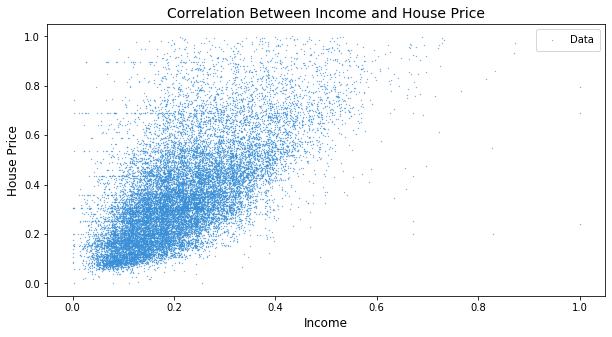

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=0.1)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [9]:
def SGD( X, y, lr = 0.01, epochs=100, batch_size = 1):
  # repeat the loop epoch times,
  # after taking batch size elements update the weights.
  n = len( X)
  m = 0
  b = 0
  mse = []

  for j in range( epochs):

    grad_b = grad_m = 0 #these contains the gradient after every batch
    t = 0 # this contains where is the pointer at an instant

    # below while loop handles all the gradient calculation + one epoch
    while( t < n):
      grad_b = grad_m = 0

      # this loop handles the gradient calculation
      for i in range( batch_size):
        if n <= t +i:
          break 
        grad_b += ( y[t +i] - ( m * X[t +i]) - b) / batch_size
        grad_m += ( ( y[t +i] - ( m * X[t +i]) - b) * X[t +i]) / batch_size
      
      t += batch_size  #increasing the pointer after calculating

      # i have already taken the negative factor in account by 
      # doing y - w x rather than w x - y
      m += lr * grad_m
      b += lr * grad_b

    error = y - m * X - b
    error = np.matmul( error.T, error)
    mse.append( error / n)
  return m, b, mse

In [40]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=100)

print( 'Parameters of the line are: ')
print( '    Slope = ', m)
print( '    Intercept = ', b)



Parameters of the line are: 
    Slope =  1.061310398829564
    Intercept =  0.13460268745309822


Plotting the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

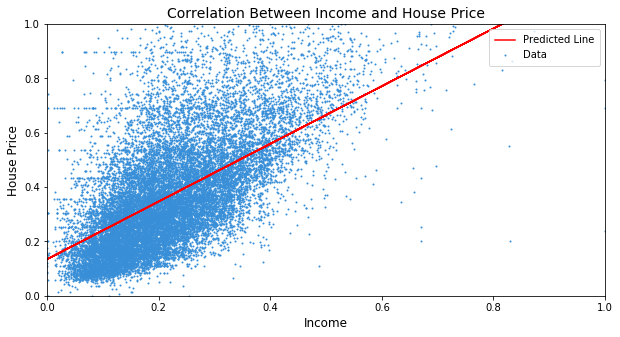

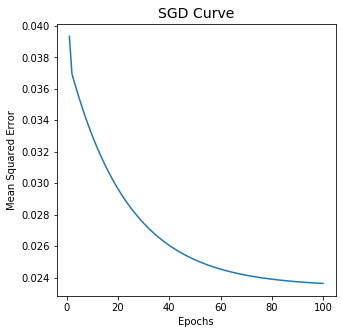

In [41]:
y_pred = m*X + b

# used from above
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=1)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.plot( X, y_pred, color = 'red', label = 'Predicted Line')
plt.xlim( 0, 1)
plt.ylim( 0, 1)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
# plt.show()

#plotting SGD curve
plt.figure( figsize = ( 5, 5))
plt.plot( np.arange( 1, 101), mse)
plt.xlabel( 'Epochs', fontsize = 10)
plt.ylabel( 'Mean Squared Error', fontsize = 10)
plt.title( 'SGD Curve', fontsize = 14)
plt.show()

#**SVM**



---


**Generating Random linearly separable data**


---



In [12]:
data = [[np.random.rand() * 10, np.random.rand() * 10] for i in range(100)]
for i, point in enumerate(data):
  x, y = point
  
  if x - y > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



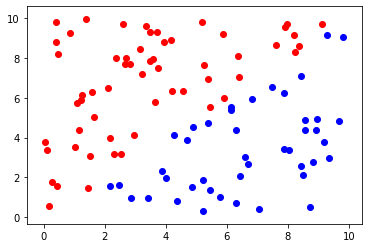

In [13]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)



---


**Training a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples.**


---



In [14]:
def l_val( x, y, w):
    return max( [ 0, 1 - y * np.matmul( w, x)])

In [15]:
def func_val( x, y, w, lamb):
    ret_val = lamb * np.matmul( w, w.T) / 2
    ret_val += l_val( x, y, w)
    return ret_val

In [16]:
def boundary( x, y, w):
    ret_val = y * np.matmul( w, x)
    if ret_val < 1:
        return 1
    else:
        return 0

In [17]:
def grad_func( x, y, w, lamb):
    grad = lamb * w
    grad -= boundary( x, y, w) * y * x
    return grad

In [18]:
def svm_function(x, y, epoch, l_rate):
    x = np.concatenate( [ np.ones( ( 1, x.shape[1])), x])
    w = np.zeros( ( 1, x.shape[0])) # w is directly a row vector to avoid transposing

    for t in range( epoch):
        i = random.randint( 0, y.shape[0] - 1)
        lamb = 1 / ( t+1) / l_rate
        # print( 'X = {}\n\ny = {}\n\nweights = {}'.format( x[ :, i], y[i], w))
        grad_val = grad_func( x[ :, i], y[i], w, lamb) # sending only that value which is concerned
        w -= l_rate * grad_val
    
    return w 



---


**Run SVM Classifier**


---



In [19]:
data = np.asarray(data)
X = data[:,:2]
X = X.T
Y = data[:,2]
w = svm_function(X, Y, 1000, 1)
print( 'X = {}\n\ny = {}\n\nweights = {}'.format( X, Y, w))

X = [[3.94125363 5.39313241 5.43362349 8.81867798 4.70009995 9.68808101
  6.35990085 3.48754019 5.87580992 4.86814595 3.57415773 2.16525005
  6.28452394 3.42246743 5.22496368 7.05104648 0.1124666  3.87920538
  8.42849716 0.26487127 3.46444685 5.45399235 0.39621641 2.8698605
  1.07830666 7.91040899 4.36982702 4.20039159 9.29134909 5.1770998
  9.82474602 3.13842025 6.40654234 5.24712476 6.42137737 2.45917574
  0.18158594 8.54812637 1.21890266 4.55383806 0.4353651  9.11820391
  2.65125176 2.68614253 2.96492032 5.38738315 8.24407493 5.76758705
  4.00985527 8.71110623 1.02876165 3.21499778 1.25860534 4.89952842
  6.60692905 0.03708719 1.43564616 7.46752132 7.88190013 2.3516785
  3.75838958 9.34152384 8.50812589 6.14578889 1.57801223 2.18423991
  0.45062641 3.70432807 1.15898674 6.6847577  3.35318837 1.38172925
  7.87890807 2.80928377 6.81071088 4.2723518  5.89428954 0.86551281
  2.54144553 8.92754621 6.30738758 8.02721594 3.65613233 7.98611785
  8.1936715  8.42903308 8.55138195 0.39864454 2

# **Visualize the classifier**


---

Writing a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (x = y). 

---



In [20]:
def plot_margin( arr, w, val):
    arr = -( w[0, 0] + w[0, 1] * arr) / w[0, 2]
    arr = arr - val
    return arr

In [21]:
def plot_svm( arr, w):
    return -( w[0, 0] + w[0, 1] * arr) / w[0, 2]

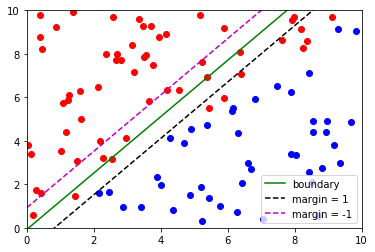

In [22]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,10)
  plt.ylim(0,10)

plt.plot( np.arange( 0, 10.1, 1), plot_svm( np.arange( 0, 10.1, 1), w), color = 'green', label = 'boundary')

# plotting margins
plt.plot( np.arange( 0, 10.1, 1), plot_margin( np.arange( 0, 10.1, 1), w, 1), 'k--', label = 'margin = 1')
plt.plot( np.arange( 0, 10.1, 1), plot_margin( np.arange( 0, 10.1, 1), w, -1), 'm--', label = 'margin = -1')

plt.legend()
plt.show()

# you can say y is the output of the function
# all the variables of line are in form of 
# constant + var1 * x + var2 * y = 0
# so line form is defined in plot_svm

In [23]:
print( 'Properties of dividing (green) line:')
print( 'Slope: ', np.round( -w[0,1]/w[0,2], 3), '    <Real value = 1>')
print( 'Intercept: ', np.round( -w[0,0]/w[0,2], 3), '<Real value = 0>')

Properties of dividing (green) line:
Slope:  1.297     <Real value = 1>
Intercept:  -0.075 <Real value = 0>
